# 1. Network analysis considerations
### 1-1) 문제 정의
    전기차 시장에서 배터리 업체에 따른 완성차 회사의 네트워크 분석한다.
      
### 1-2) 가설 설정
    현재 전기차 배터리로 사용되는 2차 전지는 형태에 따라 크게 원통형, 각형, 파우치형으로 나뉜다.
    이에 따라 네트워크에서 거리가 가까우면(관계성 높으면) 완성차 회사에서 사용하는 배터리의 연관성 확인할 수 있을 것으로 판단된다.
      
### 1-3) Two mode matrix 정의
    2020 전기차 배터리 Top6 공급사와 전기 완성차 Top8 회사를 Entity로 Matrix를 정의한다.
    이를 통해 완성차 회사와 배터리 회사의 관계를 확인하고 배터리 업체에 따른 완성차 회사의 관계를 확인한다.
    만약, 완성차 A회사와 B회사가 네트워크상 가까운 거리라면, 두 회사는 같은 배터리를 사용할 확률이 높다.
    
### 1-4) 관계 정의
    각 전기차 완성차 회사에 대한 배터리 공급사의 여부에 따라 이진법으로 표기한다.
    만약, X 배터리 회사가 A 완성차 회사에 배터리를 공급하면 1, 공급하지 않는다면 0으로 표기한다.
    
### 1-5) Similarity를 이용한 One Mode Matrix 변환
    유사도 측정 방법으로는 Jaccard index를 사용한다.
    만약, 완성차 A 회사의 배터리 공급업체가 x1, x2, x4 3개 업체이고 B 회의 배터리 공급업체가 x2, x5라면, 1/4 = 0.25이다.

# 2. 자료조사를 통한 Entity정의

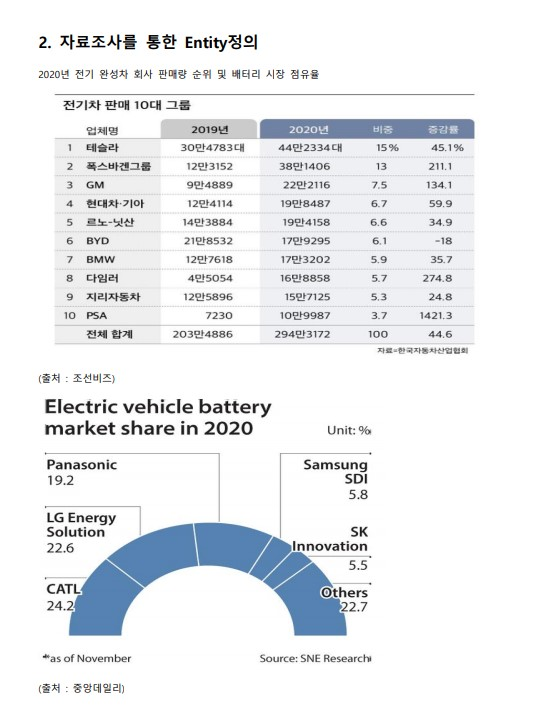

In [14]:
from IPython.display import Image
Image("./img/1.jpg")

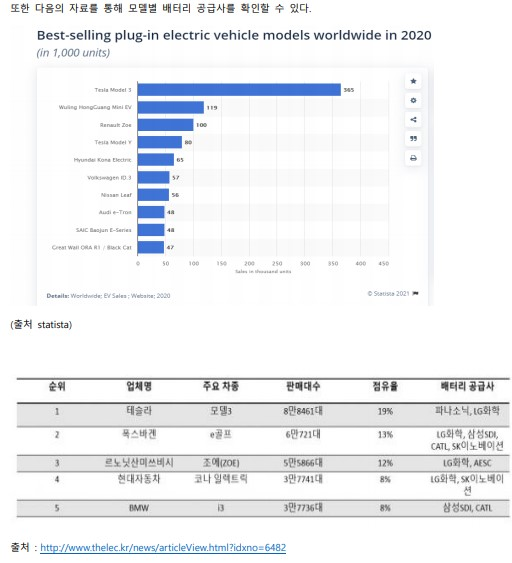

In [15]:
Image("./img/2.jpg")

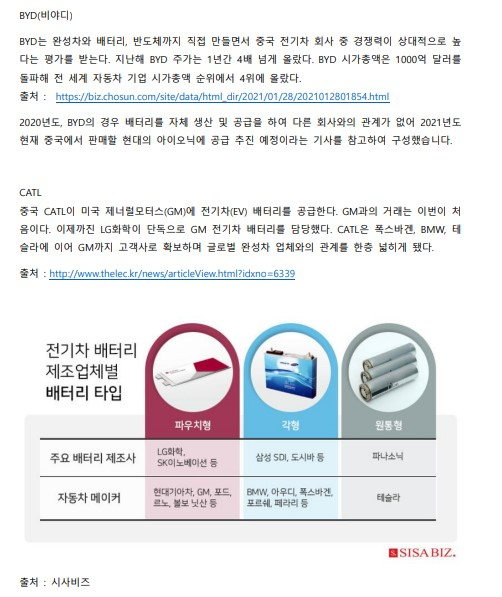

In [17]:
Image("./img/3.jpg")

# 3. Network Analysis 

### 3-1 Two mode matrix 작성
    자료 조사를 통해 2020 전기차 배터리 Top6 공급사와 전기완성차 Top8 회사를 Entity로 설정하여
    Two Mode Matrix를 작성하였습니다. (1: 배터리 공급, 0: 배터리 미공급)

In [28]:
import pandas as pd
df_cars = pd.read_excel('Cars.xlsx',encoding='utf-8',index_col=0)
df_cars

,CATL,LGEnergy,Panasonic,SamsungSDI,SKinno,BYD
Tesla,1,1,1,0,0,0
VW,1,1,0,1,1,0
Nis,0,1,0,0,0,0
Hyundai,1,1,0,1,1,1
BMW,1,0,0,1,0,0
BYD,0,0,0,0,0,1
GM,1,1,0,0,0,0
Benz,1,1,0,0,1,0



### 3-2 Jaccard Similarity를 이용한 One Mode Matrix 변환
    예를 들어 테슬라의 경우, [ CATL, LG에너지솔루션, 파나소닉] 에서 배터리 공급을 받고 
    VW그룹은 [CATL, LG에너지솔루션, 삼성SDI, SK이노베이션]에서 배터리 공급을 받습니다.
    따라서 테슬라-VW그룹의 one mode matrix에서의 값은 2/5 = 0.4입니다.
    분자 = 2 CATL, LG에너지솔루션
    분모 = 5 = 3(CATL, G에너지솔루션, 파나소닉) + 4(CATL, LG에너지솔루션, 삼성SDI, SK이노베이션) –2(CATL, LG에너지솔루션)

In [31]:
df_Jaccard = pd.read_excel('Jaccard.xlsx',encoding='utf-8',index_col=0)
df_Jaccard

,Tesla,VW,Nis,Hyundai,BMW,BYD,GM,Benz
JACCARD,,,,,,,,
Tesla,0.000000,0.40,0.250000,0.40,0.250000,0.0,0.666667,0.500000
VW,0.400000,0.00,0.200000,1.00,0.500000,0.0,0.500000,0.750000
Nis,0.250000,0.20,0.000000,0.20,0.000000,0.0,0.333333,0.250000
Hyundai,0.400000,1.00,0.200000,0.00,0.500000,0.2,0.500000,0.750000
BMW,0.250000,0.50,0.000000,0.50,0.000000,0.0,0.333333,0.250000
BYD,0.000000,0.00,0.000000,0.20,0.000000,0.0,0.000000,0.000000
GM,0.666667,0.50,0.333333,0.50,0.333333,0.0,0.000000,0.666667
Benz,0.500000,0.75,0.250000,0.75,0.250000,0.0,0.666667,0.000000




autos=['Tesla','VW','NIS','Hyundai','BMW','BYD','GM','BenZ']
tesla = [0   , 0.4 ,0.25, 0.4 , 0.25, 0  , 0.67, 0.5]
vw =    [0.4 , 0   ,0.2 , 1   , 0.5 , 0  , 0.5 , 0.75]
nis =   [0.25, 0.2 ,0   , 0.2 , 0   , 0  , 0.33, 0.25]
hk=     [0.4 , 1   ,0.2 , 0   , 0.5 , 0.2, 0.5 , 0.75]
bmw =   [0.25, 0.5 ,0   , 0.5 , 0   , 0  , 0.33, 0.25]
byd =   [0   , 0   ,0   , 0.2 , 0   , 0  , 0   , 0]
gm =    [0.67, 0.5 ,0.33, 0.5 , 0.33, 0  , 0   , 0.67]
benz =  [0.5 , 0.75,0.25, 0.75, 0.25, 0  , 0.67, 0]
Mat  = [tesla, vw, nis, hk,bmw, byd, gm, benz] 
df = pd.DataFrame(Mat,index =autos, columns = autos)

In [29]:
import networkx as nx 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



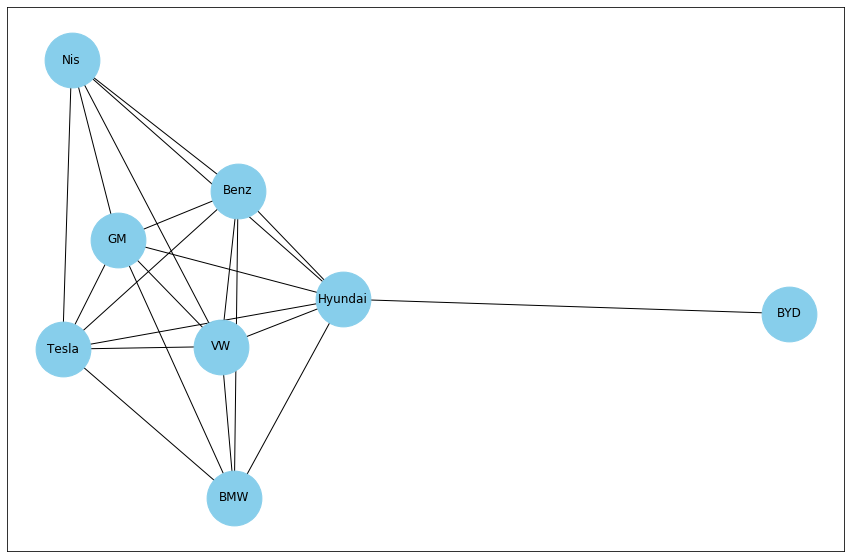

In [32]:
plt.figure(figsize=(15,10))
G = nx.from_pandas_adjacency(df_Jaccard)

nx.draw_networkx(G,node_size=3000, node_color='skyblue')

In [33]:
nx.to_numpy_matrix(G) 

matrix([[0.        , 0.4       , 0.25      , 0.4       , 0.25      ,
         0.        , 0.66666667, 0.5       ],
        [0.4       , 0.        , 0.2       , 1.        , 0.5       ,
         0.        , 0.5       , 0.75      ],
        [0.25      , 0.2       , 0.        , 0.2       , 0.        ,
         0.        , 0.33333333, 0.25      ],
        [0.4       , 1.        , 0.2       , 0.        , 0.5       ,
         0.2       , 0.5       , 0.75      ],
        [0.25      , 0.5       , 0.        , 0.5       , 0.        ,
         0.        , 0.33333333, 0.25      ],
        [0.        , 0.        , 0.        , 0.2       , 0.        ,
         0.        , 0.        , 0.        ],
        [0.66666667, 0.5       , 0.33333333, 0.5       , 0.33333333,
         0.        , 0.        , 0.66666667],
        [0.5       , 0.75      , 0.25      , 0.75      , 0.25      ,
         0.        , 0.66666667, 0.        ]])

In [34]:
nx.betweenness_centrality(G)

{'Tesla': 0.009523809523809525,
 'VW': 0.009523809523809525,
 'Nis': 0.0,
 'Hyundai': 0.29523809523809524,
 'BMW': 0.0,
 'BYD': 0.0,
 'GM': 0.009523809523809525,
 'Benz': 0.009523809523809525}

In [35]:
nx.closeness_centrality(G)

{'Tesla': 0.875,
 'VW': 0.875,
 'Nis': 0.7777777777777778,
 'Hyundai': 1.0,
 'BMW': 0.7777777777777778,
 'BYD': 0.5384615384615384,
 'GM': 0.875,
 'Benz': 0.875}

In [36]:
nx.degree_centrality(G)

{'Tesla': 0.8571428571428571,
 'VW': 0.8571428571428571,
 'Nis': 0.7142857142857142,
 'Hyundai': 1.0,
 'BMW': 0.7142857142857142,
 'BYD': 0.14285714285714285,
 'GM': 0.8571428571428571,
 'Benz': 0.8571428571428571}